In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [26]:
raw_eqk = pd.read_csv("https://raw.githubusercontent.com/carmengg/eds220-hwk-1/main/data/earthquake_data.csv")

In [27]:
raw_eqk.head()

,time,latitude,longitude,depth,mag,id,place,type
0,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ak11155107,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,nn00436847,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ak11151142,"12km NNW of North Nenana, Alaska",earthquake
3,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ak11151135,"22km S of Cantwell, Alaska",earthquake
4,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ci37171541,"10km WNW of Progreso, Mexico",earthquake


In [28]:
raw_eqk.type

0         earthquake
1         earthquake
2         earthquake
3         earthquake
4         earthquake
             ...    
120103    earthquake
120104    earthquake
120105    earthquake
120106    earthquake
120107    earthquake
Name: type, Length: 120108, dtype: object

In [29]:
raw_eqk.type.unique()

array(['earthquake', 'quarry blast', 'quarry', 'mining explosion',
       'rock burst', 'explosion', 'landslide', 'sonicboom', 'sonic boom',
       'anthropogenic event', 'acoustic noise'], dtype=object)

In [30]:
raw_eqk.type

0         earthquake
1         earthquake
2         earthquake
3         earthquake
4         earthquake
             ...    
120103    earthquake
120104    earthquake
120105    earthquake
120106    earthquake
120107    earthquake
Name: type, Length: 120108, dtype: object

In [31]:
eqk = raw_eqk[(raw_eqk.type == 'earthquake') & (raw_eqk.mag >= 6.5)] 

In [35]:
eqk = gpd.GeoDataFrame(eqk, 
                      geometry = gpd.points_from_xy(eqk.longitude, eqk.latitude), 
                      crs = 'EPSG:4326')

<AxesSubplot:>

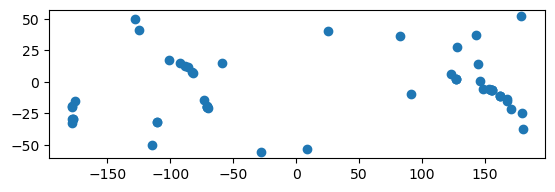

In [39]:
eqk.plot()

In [40]:
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
worldmap

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


<AxesSubplot:>

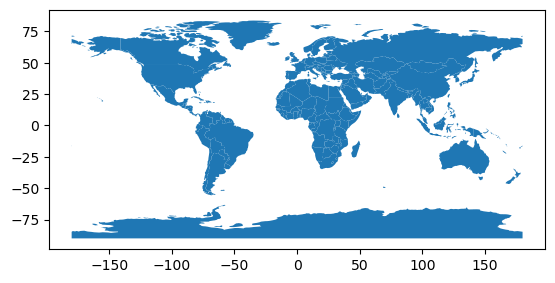

In [41]:
worldmap.plot()

<AxesSubplot:>

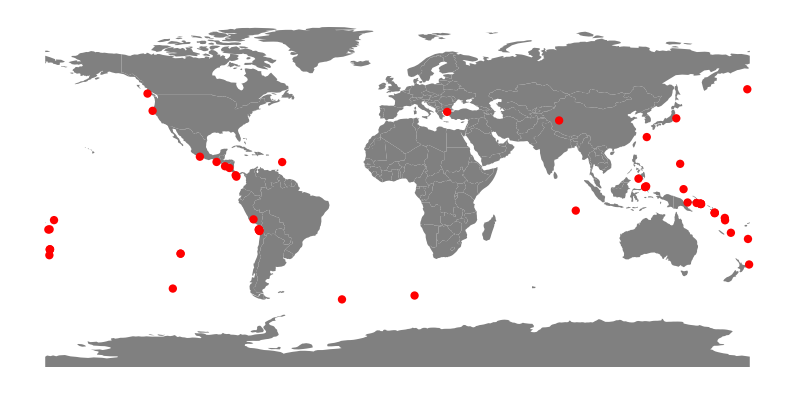

In [57]:
fig, ax = plt.subplots(figsize=(10,16))

ax.axis('off')

worldmap.plot(ax=ax,
             color='grey',
             edgecolor='none')

eqk.plot(ax=ax,
             color='red',
             edgecolor='none',
        legend=True)